# Task 2: Exploratory Data Analysis (EDA)
  
- Importing required libraries
- Generating summary statistics (mean, median, std, etc.)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the Titanic dataset
file_path = "Titanic-Dataset.csv"
df = pd.read_csv(file_path)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Visual Analysis
- Create histograms and boxplots for numeric features

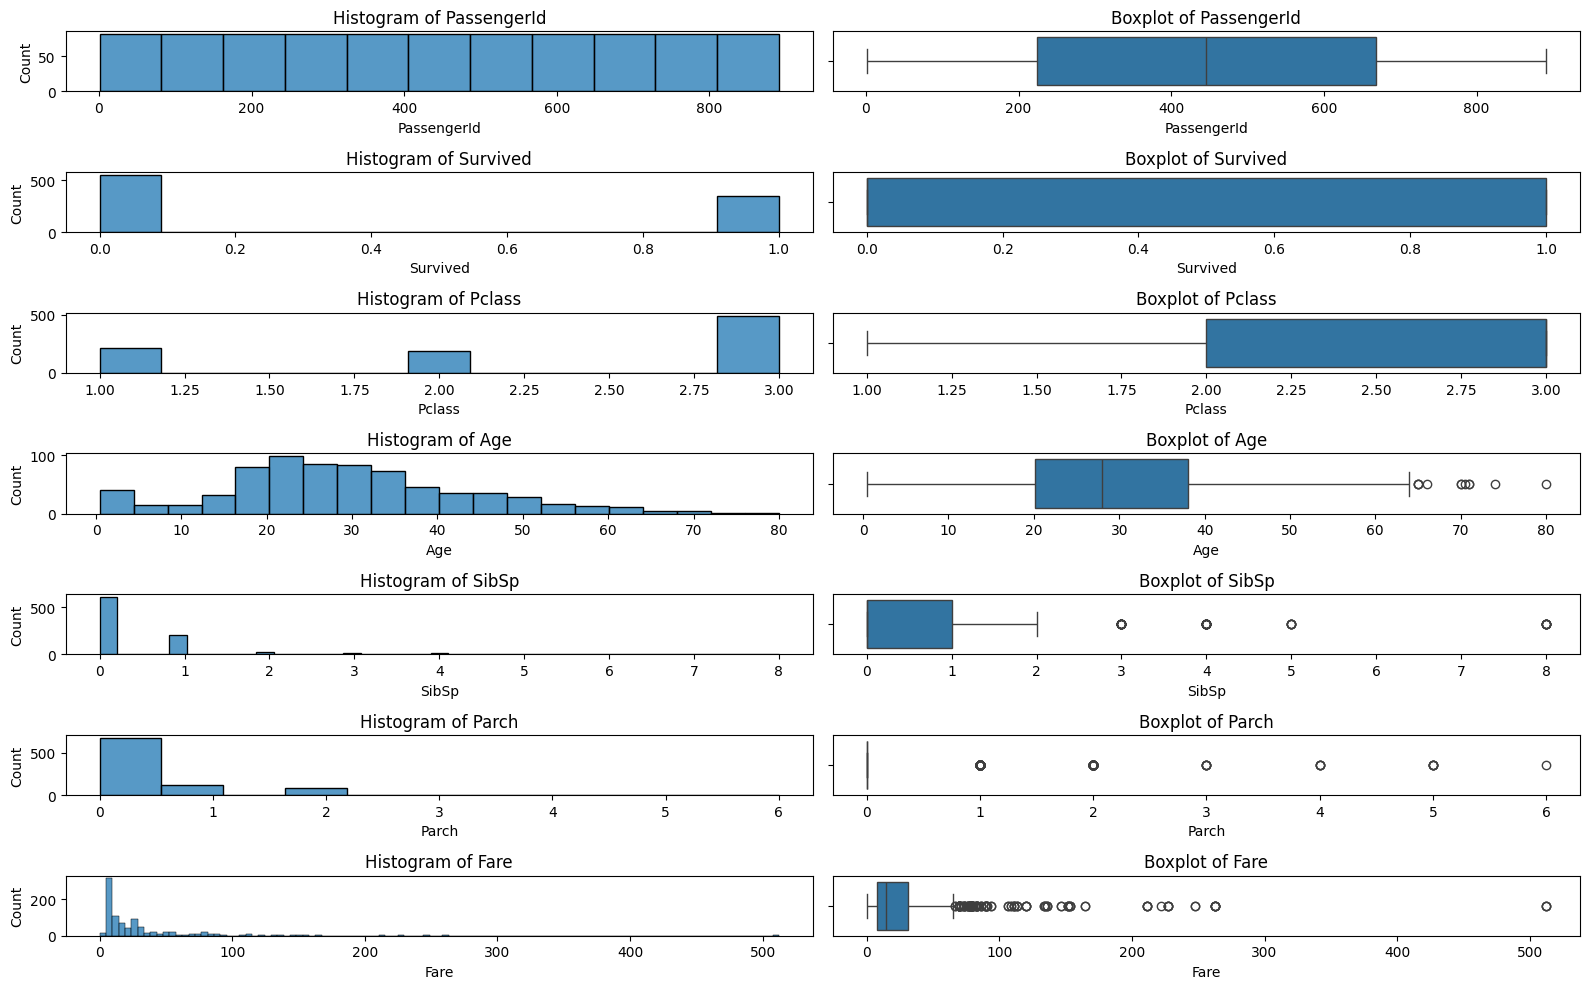

In [5]:
# Selecting numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Generating histograms and boxplots for numeric features
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, 2*i-1)
    sns.histplot(df[col].dropna())
    plt.title(f'Histogram of {col}')
    
    plt.subplot(len(numeric_cols), 2, 2*i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Histograms
- Age is approximately right-skewed, with a concentration between 20–40 years.

- Fare is highly skewed with most fares under 100 but outliers up to 512.

- SibSp and Parch are heavily zero-dominated (most passengers had no siblings/spouse or parents/children with them).

Boxplots  
Outliers are visible in:

- Fare (extremely high values).

- SibSp and Parch (values like 5, 6, 8).

- Age has mild outliers at older ages.

###  Feature relationships
- Use pairplot/correlation matrix for feature relationships.
- Identify patterns, trends, or anomalies in the data

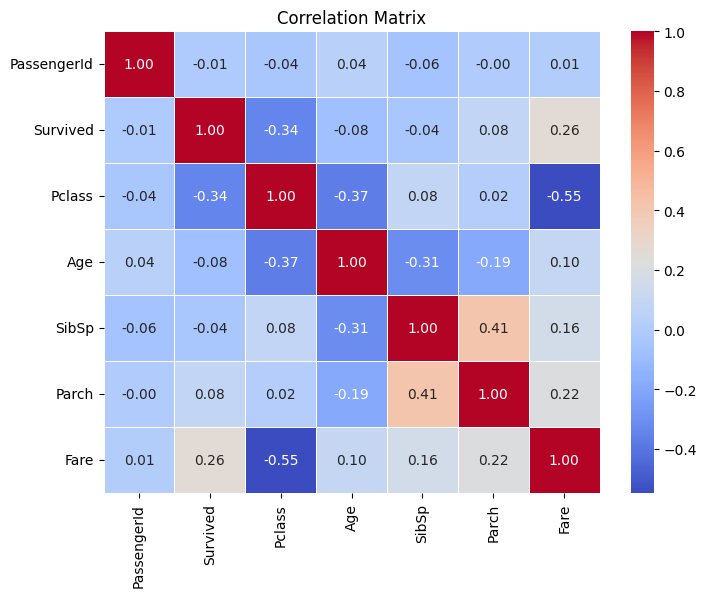

In [6]:
# Create a heatmap using seaborn
plt.figure(figsize=(8, 6)) 
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

<Figure size 800x600 with 0 Axes>

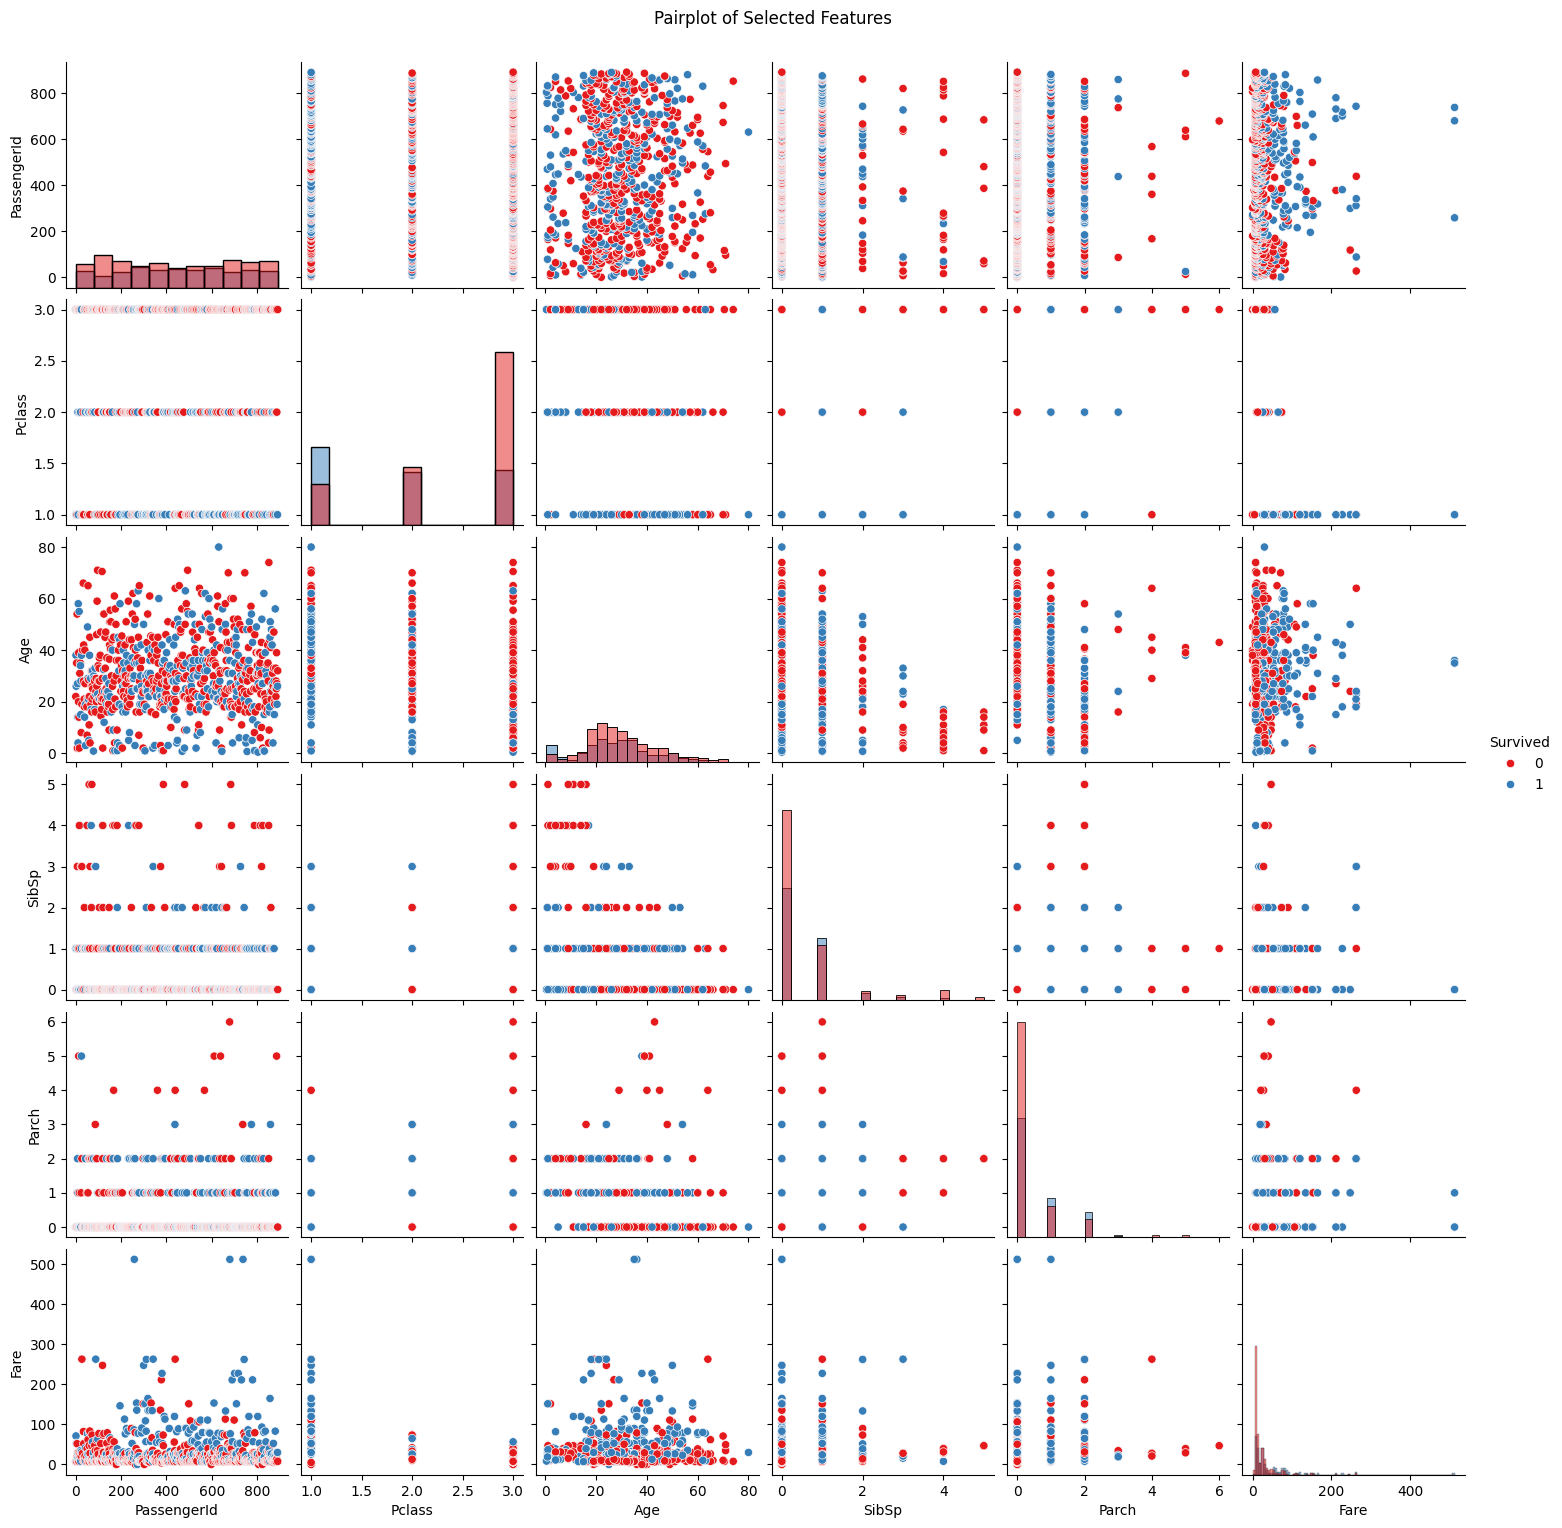

In [9]:
plt.figure(figsize=(8, 6)) 
sns.pairplot(df[numeric_cols].dropna(), hue='Survived', palette='Set1', diag_kind='hist')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

1. Correlation Observations:
- Fare and Pclass are negatively correlated — lower class means cheaper fare.

- SibSp and Parch show weak correlation to Survived, indicating some family presence might impact survival chances.

2. Trends:
- Passengers in Pclass 1 tend to have higher survival.

- Younger passengers seem to survive more.

- Higher fare is loosely associated with higher survival, likely due to cabin/class advantages.

3. Anomalies:
- Extreme Fare outliers — luxury passengers.

- SibSp and Parch have rare values like 5 or 6, indicating large families, which is uncommon.